In [1]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.lines import Line2D
from pylab import rcParams
rcParams['figure.figsize'] = 25, 10
import numpy as np 
import dill as pickle
import os
import random
import datetime 
import sys 
import seaborn as sns
from einops import rearrange
import matplotlib as mpl
from matplotlib.patches import Rectangle
import pandas as pd
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command


np.random.seed(0)
random.seed(0)
now = datetime.datetime.now().strftime("%B_%d_%Y_%H_%M_%S")
workingdirectory = os.popen('git rev-parse --show-toplevel').read()[:-1]
sys.path.append(workingdirectory)
os.chdir(workingdirectory)

from codes.flasso.Replicate import Replicate, get_support_indices2d,get_detected_values2d
from codes.experimentclasses.AtomicRegression2 import AtomicRegression
from codes.otherfunctions.get_cosines import get_cosines
from codes.plotting.supportrecovery import plot_watch3,plot_reg_path_ax_lambdasearch_customcolors_norm
from itertools import combinations
from codes.otherfunctions.utils import get_min_min, get_mu_full_ind, get_kappa_s,get_gamma_max
from codes.plotting.utils import get_ordered_axes, get_names,get_cmap

In [2]:
nreps = 25
nsel = 100

with open('/Users/samsonkoelle/manifoldflasso_jmlr/untracked_data/embeddings/ethanol/ethanol_0219_fullreplicates_small_abscos.pkl' ,
         'rb') as loader:
     replicates0 = pickle.load(loader)

with open('/Users/samsonkoelle/manifoldflasso_jmlr/untracked_data/embeddings/ethanol/ethanol_0223_fullreplicates_small.pkl' ,
         'rb') as loader:
     replicates = pickle.load(loader)


In [3]:
min_mins = np.zeros(nreps, dtype = np.float64)
mus = np.zeros(nreps, dtype = np.float64)
kappas = np.zeros(nreps, dtype = np.float64)
gamma_maxs = np.zeros(nreps, dtype = np.float64)
n = nsel
for r in range(nreps):
    inds = np.asarray([74,176])#sel_tol[r]
    dg_M = replicates[r].dg_M
    min_mins[r]  = get_min_min(dg_M[:,:,inds]*n)
    mus[r] = get_mu_full_ind(np.swapaxes(dg_M,1,2)*n, inds)
    kappas[r] = get_kappa_s(replicates[r].dg_M[:,:,inds[0]:(inds[0]+1)]*n)
    gamma_maxs[r] = get_gamma_max(dg_M[:,:,inds]*np.sqrt(n ) )

columns = np.asarray([r'$\bar \mu$', r'$\sigma_\mu$',
                     r'$\bar {\kappa_S}$', r'$\sigma_{\kappa_S}$',
                     r'$\bar {\gamma_{\text{max}}}$', r'$\sigma_{\gamma_{\text{max}}}$',
                     r'$\bar {\min_{i = 1}^{n} \min_{j \in S } ||x_{ij}|| }$', r'$\sigma_\mu$'])

df_eth = pd.DataFrame(np.asarray([np.mean(mus), np.sqrt(np.var(mus)), 
                    np.mean(kappas), np.sqrt(np.var(kappas)),
                    np.mean(gamma_maxs),np.sqrt(np.var(gamma_maxs)),
                    np.mean(min_mins),np.sqrt(np.var(min_mins))]).transpose(), index = columns).transpose()
 
#df_eth.to_csv('/Users/samsonkoelle/Downloads/manigrad-100818/mani-samk-gradients/untracked_data/embeddings/ethfullparam.csv')


In [4]:

sel_l = np.zeros(nreps, dtype = int)
sel = {}
#min_sel = {}
for r in range(nreps):
    replicates[r].get_ordered_axes()
    sel_l[r] = replicates[r].get_selection_lambda()
    sel[r] = np.where((replicates[r].cs_reorder**2).sum(axis = 1).sum(axis = 1)[sel_l[r]] !=0.)[0]
    #min_sel[r] =  np.where((replicates[r].cs_reorder**2).sum(axis = 1).sum(axis = 1)[1] !=0.)[0]

In [5]:
subset_l0 = np.unique(np.concatenate(list(sel.values())) )
toplot_l0 = get_support_indices2d(subset_l0, sel,25)
names_l0 = get_names(subset_l0)
colors_l0 = get_cmap(subset_l0)

In [6]:
#%matplotlib inline
r = 0
rep = replicates0[r]
clustermap = sns.clustermap(rep.cos)
clustermap.ax_row_dendrogram.set_visible(False)
clustermap.ax_col_dendrogram.set_visible(False)

In [7]:
%matplotlib inline

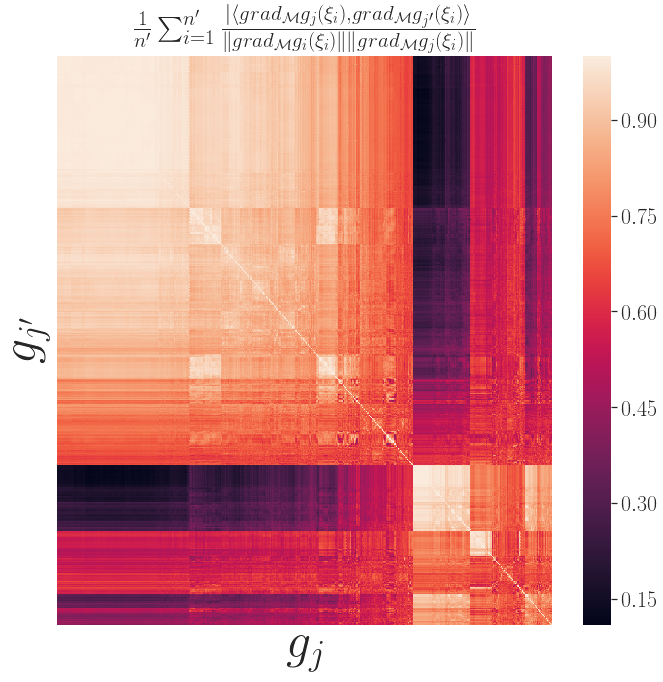

In [8]:
sns.set(font_scale=2)
f, axarr = plt.subplots(1,1, figsize=(10, 10))
#[ax.set_axis_off() for ax in axarr.ravel()]
sns.heatmap(rep.cos[clustermap.dendrogram_col.reordered_ind][:,clustermap.dendrogram_col.reordered_ind], ax = axarr)
axarr.set_title(r"$\frac{1}{n'} \sum_{i = 1}^{n'} \frac{ | \langle grad_{\mathcal M} g_j (\xi_i) ,grad_{\mathcal M} g_{j'} (\xi_i)\rangle}{\|grad_{\mathcal M} g_i (\xi_i) \| \| grad_{\mathcal M} g_j(\xi_i) \|} $" ,
                fontsize = 30)
axarr.set_xticklabels([])
axarr.set_yticklabels([])
axarr.set_xticks([])
axarr.set_yticks([])
axarr.set_xlabel(r'$g_j$', fontsize= 50)
axarr.set_ylabel(r"$g_{j'}$", fontsize= 50)
plt.tight_layout()
#plt.savefig('/Users/samsonkoelle/Downloads/manigrad-100818/mani-samk-gradients/Figures/figure_for_jmlr/eth_fulldict_cosines')


1.0 0.0
0.9009688679024191 0.4338837391175581
0.6234898018587336 0.7818314824680297
0.22252093395631445 0.9749279121818236
-0.22252093395631434 0.9749279121818236
-0.6234898018587334 0.7818314824680299
-0.900968867902419 0.43388373911755823
-1.0 1.2246467991473532e-16
-0.9009688679024191 -0.433883739117558
-0.6234898018587337 -0.7818314824680297
-0.2225209339563146 -0.9749279121818235
0.2225209339563142 -0.9749279121818236
0.6234898018587334 -0.7818314824680299
0.900968867902419 -0.4338837391175583


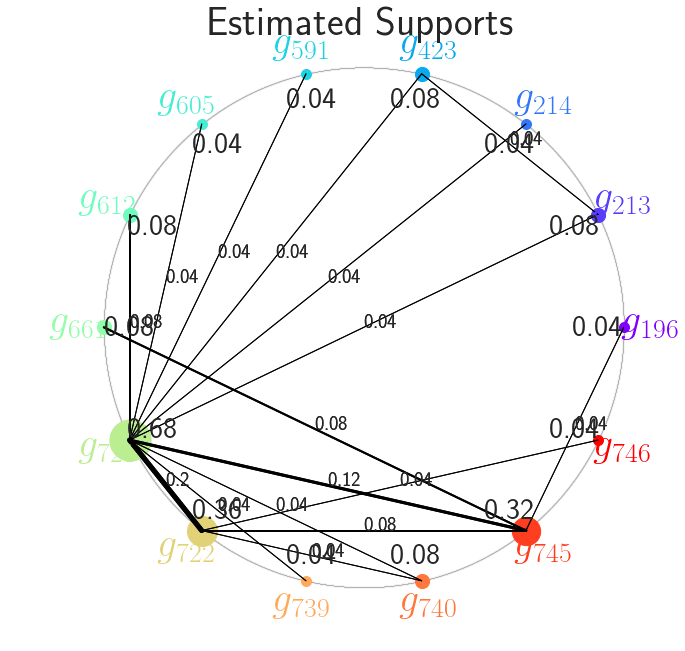

In [9]:
f, axarr = plt.subplots(figsize=(10, 10))
plot_watch3(toplot_l0, names=names_l0, colors=colors_l0, ax = axarr, nreps = nreps)
axarr.set_title('Estimated Supports', fontsize=  40)
plt.tight_layout()
#plt.savefig('/Users/samsonkoelle/Downloads/manigrad-100818/mani-samk-gradients/Figures/figure_for_jmlr/eth_fulldict_estimatedsupports')

In [10]:
#colors_l0 = get_color_subset(colors_superset, superset, subset_l0)
subset_l0_plusgt = np.concatenate([[74,176],subset_l0]) #74,176 ground truth
names_l0 = get_names(subset_l0_plusgt)
cuz_l = np.abs(get_cosines(np.swapaxes(replicates[0].dg_M[:,:,subset_l0_plusgt], 1,2)))
cuz_l0 = np.mean(cuz_l, axis = 0)
colors_l0_plusgt = np.vstack([[[0,0,1,1], [1,.64,0,1]],colors_l0])
detected_values = get_detected_values2d(subset_l0_plusgt, sel,nreps)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]), <a list of 16 Text yticklabel objects>)

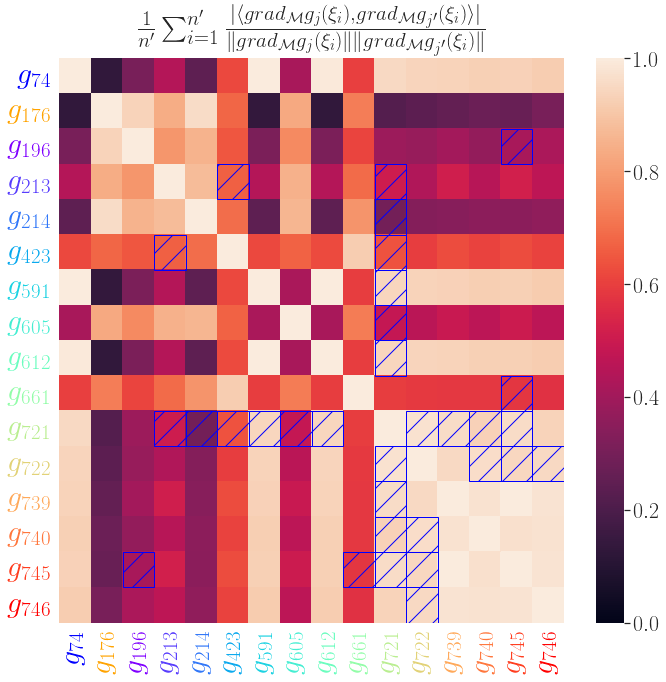

In [11]:
sns.set(font_scale=2)
f, axarr = plt.subplots(figsize=(10, 10))

sns.heatmap(cuz_l0, yticklabels = names_l0, xticklabels = names_l0, ax = axarr, vmin = 0., vmax = 1.)
axarr.set_xticklabels(axarr.get_xmajorticklabels(), fontsize = 30)
axarr.set_yticklabels(axarr.get_ymajorticklabels(), fontsize = 30)
for d in range(detected_values.shape[1]):
    axarr.add_patch(Rectangle((detected_values[1,d], detected_values[0,d]), 1, 1,facecolor = [0,1,0,0.], hatch = '/',fill= True, edgecolor='blue', lw=1))
for xtick, color in zip(axarr.get_xticklabels(), colors_l0_plusgt):
    xtick.set_color(color)
for ytick, color in zip(axarr.get_yticklabels(), colors_l0_plusgt):
    ytick.set_color(color)
axarr.set_title(r"$\frac{1}{n'} \sum_{i = 1}^{n'} \frac{|\langle grad_{\mathcal M} g_j (\xi_i) ,grad_{\mathcal M} g_{j'} (\xi_i)\rangle|}{\|grad_{\mathcal M} g_j (\xi_i) \| \| grad_{\mathcal M} g_{j'}(\xi_i) \|} $" ,
                fontsize = 30)
plt.tight_layout()
plt.yticks(rotation= 0)

In [12]:
r= 1
subset = sel[r]
colors = np.zeros((756,4))
colors[subset_l0_plusgt] = colors_l0_plusgt
xaxis_reorder = replicates[r].xaxis_reorder
cs_reorder = replicates[r].cs_reorder

In [13]:
mpl.style.use('default')

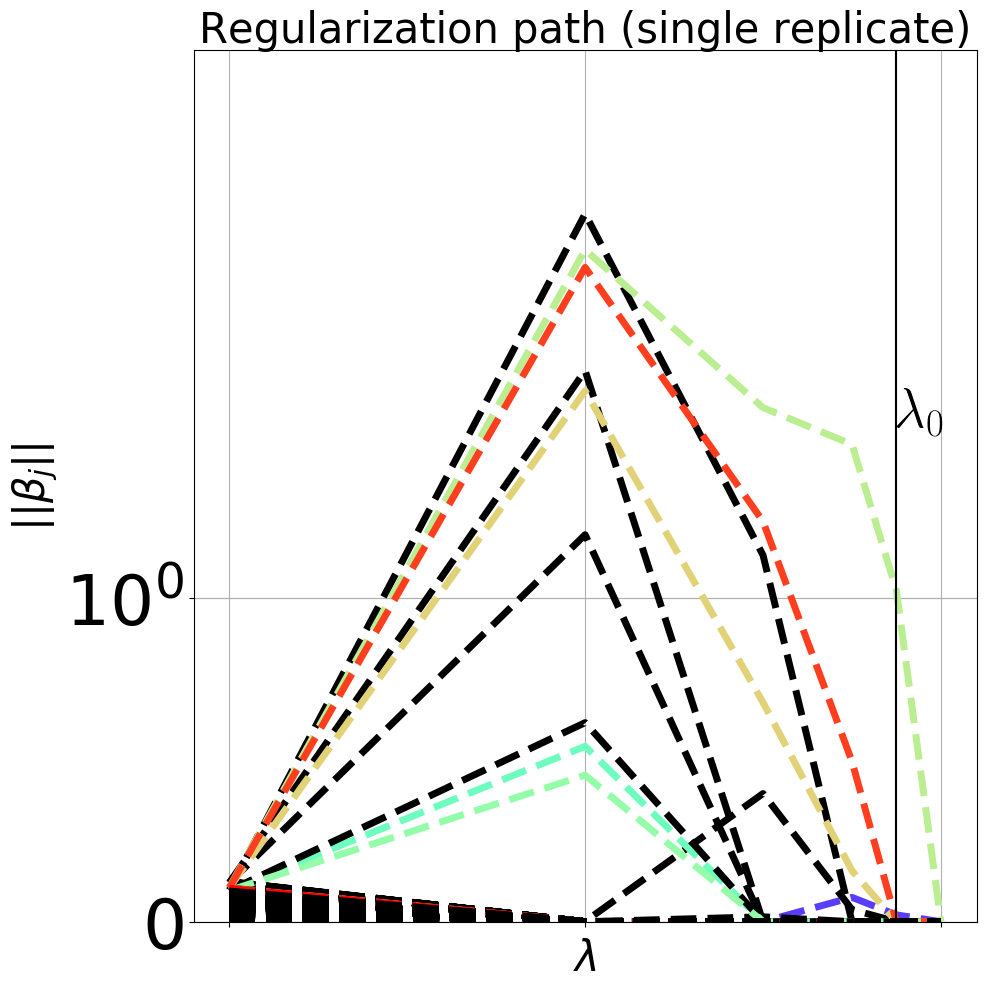

In [14]:
f, axarr = plt.subplots(1,1,figsize=(10, 10))
#axarr.set_axis_off() 
xaxis_norm = xaxis_reorder / xaxis_reorder.max()
plot_reg_path_ax_lambdasearch_customcolors_norm(axarr, cs_reorder, xaxis_norm, f,colors)#axes_all[0].imshow(asdf)
axarr.set_xlabel(r'$\lambda$', fontsize = 30, fontname = 'sans-serif')
axarr.set_ylabel(r'$||\beta_j||$', fontsize = 30, fontname = 'sans-serif')

#axarr.axvline(xaxis_reorder[1] , color = 'black')
#axarr.text(xaxis_reorder[1], 1.5, r'$\lambda_{max} / 2$', fontsize = 40)
axarr.axvline(xaxis_norm[sel_l[r]] , color = 'black')#, fontname = 'sans-serif')
axarr.text(xaxis_norm[sel_l[r]], 1.5, r'$\lambda_{0}$', fontsize = 40, fontname = 'sans-serif')
axarr.set_title('Regularization path (single replicate)')
axarr.set_xticklabels([])
plt.tight_layout()
#plt.savefig('/Users/samsonkoelle/Downloads/manigrad-100818/mani-samk-gradients/Figures/figure_for_jmlr/eth_fulldict_replicate')

#axarr.patch.set_facecolor('None')

In [15]:
from codes.flasso.FlassoExperiment2 import cosine_similarity

In [16]:
selcos = np.zeros(nreps)
for r in range(nreps):
    j1 = sel[r][0]
    j2 = sel[r][1]
    selcos[r] = np.sum(np.abs(np.asarray([cosine_similarity(replicates[r].dg_M[i,:,j1], replicates[r].dg_M[i,:,j2]) for i in range(nsel)]))) / nsel

In [17]:
np.mean(selcos), np.var(selcos)**0.5

(0.8110407041857981, 0.2203706490237822)

In [18]:
with open('/Users/samsonkoelle/manifoldflasso_jmlr/untracked_data/embeddings/ethanol/ethanol_0219_full_mflasso.pkl' ,
         'wb') as file:
     pickle.dump(sel, file)


In [19]:
from codes.otherfunctions.get_dictionaries import get_index_matching, get_atoms_4, get_all_atoms_4
natoms = 9 
ii = np.asarray([0,0,0,0,1,1,1,2]) # atom adjacencies for dihedral angle computation
jj = np.asarray([1,2,3,4,5,6,7,8])

atoms4,p = get_atoms_4(natoms, ii, jj)

atoms4_all,p = get_all_atoms_4(natoms)
superset = atoms4_all
superset = np.asmatrix(superset)

matchingindex= np.zeros(12)
for p in range(12):
    matchingindex[p] = get_index_matching(atoms4[p], superset)
matchingindex = np.asarray(matchingindex, dtype = int)

In [21]:
#0 lambda true coeffs
tol = 1e-16
learning_rate = 1.
max_iter = 500
reg_l2 = 0

coses = np.zeros((nreps,12,12))
for r in range(nreps):
    print(r)
    rep = replicates[r]
    for i in range(9):
        for j in range(9,12):
            j1= matchingindex[i]
            j2 =matchingindex[j]
            coses[r,i,j] = np.sum(np.abs(np.asarray([cosine_similarity(replicates[r].dg_M[i,:,j1], replicates[r].dg_M[i,:,j2]) for i in range(nsel)]))) / nsel
            
np.mean(coses[np.nonzero(coses)]), np.var(coses[np.nonzero(coses)])**(0.5)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


(0.15528006859224222, 0.019887576764260752)

In [24]:
#0 lambda true coeffs
tol = 1e-16
learning_rate = 1.
max_iter = 500
reg_l2 = 0

coses = np.zeros((nreps,2,2))
coses_match =  np.zeros((nreps,12,12))
for r in range(nreps):
    print(r)
    rep = replicates[r]
    
    j1 = 74
    j2 = 176
    j3 = sel[r][0]
    j4 = sel[r][1]
    
    coses[r,0,0] = np.sum(np.abs(np.asarray([cosine_similarity(replicates[r].dg_M[i,:,j1], replicates[r].dg_M[i,:,j3]) for i in range(nsel)]))) / nsel
    coses[r,0,1] = np.sum(np.abs(np.asarray([cosine_similarity(replicates[r].dg_M[i,:,j1], replicates[r].dg_M[i,:,j4]) for i in range(nsel)]))) / nsel
    coses[r,1,0] = np.sum(np.abs(np.asarray([cosine_similarity(replicates[r].dg_M[i,:,j2], replicates[r].dg_M[i,:,j3]) for i in range(nsel)]))) / nsel
    coses[r,1,1] = np.sum(np.abs(np.asarray([cosine_similarity(replicates[r].dg_M[i,:,j2], replicates[r].dg_M[i,:,j4]) for i in range(nsel)]))) / nsel


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [25]:
np.mean(coses.max(axis = 2)), np.var(coses.max(axis = 2))**(0.5)

(0.6803307337715084, 0.31830458113731835)

In [45]:
coses_i = np.zeros((25,2))
for r in range(25):
    mean1 = np.mean([coses[r, 0,1], coses[r, 1,0]])
    mean2 = np.mean([coses[r, 0,0], coses[r, 1,1]])
    betterpair = np.argmax([ mean1,mean2])
    if betterpair == 0:
        coses_i[r] = [coses[r, 0,1], coses[r, 1,0]]
    else:
        coses_i[r] = [coses[r, 1,1], coses[r, 0,0]]

In [47]:
np.mean(coses_i), np.var(coses_i)**(0.5)

(0.6801884760764423, 0.31838303743578544)

array([0.93353624, 0.88723719, 0.58487413, 0.58601101, 0.58215621,
       0.5869066 , 0.59823421, 0.59678556, 0.58813597, 0.62917159,
       0.58172059, 0.57749823, 0.61671354, 0.60133778, 0.70807772,
       0.82451629, 0.9452825 , 0.63366354, 0.83631646, 0.59113287,
       0.89597214, 0.57988452, 0.84744052, 0.59344611, 0.5986604 ])